In [2]:
import matplotlib.pyplot as plt
import mmap
def mapcount(filename):
    f = open(filename, "r+")
    buf = mmap.mmap(f.fileno(), 0)
    lines = 0
    readline = buf.readline
    while readline():
        lines += 1
    return lines


In [3]:
interaction_list = ['follow', 'mention','retweet','quote','reply']
results = []
for day in range(1,8):
    results.append([])
    for interaction in interaction_list:
        date_form = '-2018-02-'
        if day<10:
            date_form += '0'
        date_form += str(day)
        results[day-1].append(mapcount(interaction+date_form+'.txt'))

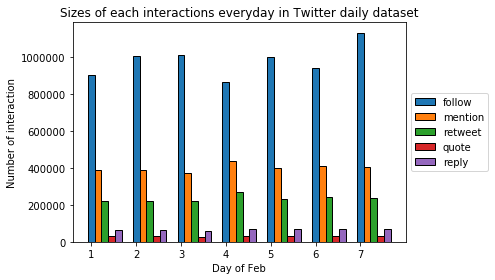

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.show()

day_list = [1,2,3,4,5,6,7]
x_index = np.arange(len(day_list))
count = 1
bar_width = 0.15
for interaction_index in range(0,5):
    day_cur_value = []
    for day in range(0,7):
        day_cur_value.append(results[day][interaction_index])
    
    plt.bar(x_index+count*bar_width, day_cur_value, width=bar_width, edgecolor='black', label=interaction_list[interaction_index] )
    count += 1
    
    
plt.xlabel('Day of Feb')
plt.xticks( x_index + bar_width, day_list)
plt.ylabel('Number of interaction')
plt.title("Sizes of each interactions everyday in Twitter daily dataset")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("twitter_size.jpg", bbox_inches='tight')
plt.show()